In [1]:
%tensorflow_version 2.x

import matplotlib.pyplot as plt
from tensorflow import keras
import os

In [2]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/
   creating: Data/Test/
   creating: Data/Test/Test/
  inflating: Data/Test/Test/4.jpg    
  inflating: Data/Test/Test/2.jpg    
  inflating: Data/Test/Test/6.jpg    
  inflating: Data/Test/Test/3.jpg    
  inflating: Data/Test/Test/1.jpg    
  inflating: Data/Test/Test/5.jpg    
   creating: Data/Train/
   creating: Data/Train/Bad/
  inflating: Data/Train/Bad/52.jpg   
  inflating: Data/Train/Bad/45.jpg   
  inflating: Data/Train/Bad/47.jpg   
  inflating: Data/Train/Bad/43.jpg   
  inflating: Data/Train/Bad/46.jpg   
  inflating: Data/Train/Bad/44.jpg   
  inflating: Data/Train/Bad/42.jpg   
  inflating: Data/Train/Bad/51.jpg   
  inflating: Data/Train/Bad/48.jpg   
  inflating: Data/Train/Bad/50.jpg   
  inflating: Data/Train/Bad/49.jpg   
  inflating: Data/Train/Bad/5.jpg    
  inflating: Data/Train/Bad/30.jpg   
  inflating: Data/Train/Bad/31.jpg   
  inflating: Data/Train/Bad/2.jpg    
  inflating: Data/Train/Bad/26.jpg   
  inflating: Data/T

The images were manually downloaded, properly cropped and labeled  
They were split into 2 categories
1. Training, to train the model
2. Test, to test the model on completely new images

Note: Due to the low amount of images collected, I didn't use a validation set

In [3]:
PATH = "Data"

train_dir = os.path.join(PATH, "Train")
test_dir = os.path.join(PATH, "Test")

# Model training data
batch_size = 6
epochs = 8

# Image size constants
IMG_WIDTH = 150
IMG_HEIGHT = 150

target_size = (IMG_HEIGHT, IMG_WIDTH)

The images are of different but similar size.  
They will be resized as they're being read, to an appropriate size to avoid heavy distortion

In [4]:
train_image_generator = keras.preprocessing.image.ImageDataGenerator(train_dir, rescale=1./255.)
test_image_generator = keras.preprocessing.image.ImageDataGenerator(test_dir, rescale=1./255.)

train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                          batch_size=batch_size,
                                                          target_size=target_size,
                                                          class_mode="binary",
                                                          shuffle=True)
test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                          batch_size=batch_size,
                                                          target_size=target_size,
                                                          class_mode="binary",
                                                          shuffle=False)

Found 115 images belonging to 2 classes.
Found 6 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


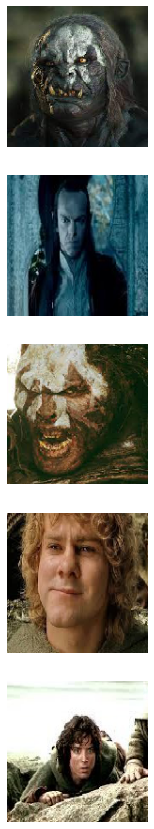

In [5]:
def plot_images(images_arr, probabilities :bool=False) -> None:
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if not probabilities:
      for img, ax in zip(images_arr, axes):
          ax.imshow(img)
          ax.axis("off")
    else:
      for img, probability, ax in zip(images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis("off")
          if probability > 0.5:
              ax.set_title("Good Folk")
          else:
              ax.set_title("Servant of Morgoth")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plot_images(sample_training_images[:5])

Augmenting the images by rotating, zooming in, changing brightness, shifting, cutting pieces

In [6]:
train_image_generator = keras.preprocessing.image.ImageDataGenerator(train_dir,
                                                                    rotation_range=40,
                                                                    width_shift_range=0.2,
                                                                    height_shift_range=0.2,
                                                                    fill_mode="nearest",
                                                                    brightness_range=[0.4,1.6],
                                                                    shear_range=0.1,
                                                                    zoom_range=0.1,
                                                                    rescale=1./255.)

Found 115 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


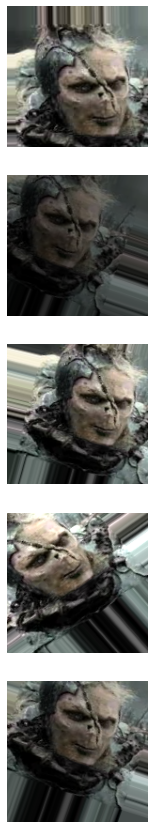

In [7]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=target_size,
                                                     class_mode="binary")

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plot_images(augmented_images)

Creating and compiling the model

In [8]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(8, (3, 3), activation="relu", padding="same", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu"))

model.summary()

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

Training the model

In [15]:
history = model.fit(x=train_data_gen, steps_per_epoch=len(train_data_gen), epochs=epochs)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


20/20 [==============================] - 3s 124ms/step - loss: 0.6844 - accuracy: 0.5304
Epoch 2/8
20/20 [==============================] - 2s 122ms/step - loss: 0.6779 - accuracy: 0.6000
Epoch 3/8
20/20 [==============================] - 3s 127ms/step - loss: 0.6471 - accuracy: 0.6261
Epoch 4/8
20/20 [==============================] - 3s 143ms/step - loss: 0.6877 - accuracy: 0.5304
Epoch 5/8
20/20 [==============================] - 3s 125ms/step - loss: 0.6182 - accuracy: 0.6609
Epoch 6/8
20/20 [==============================] - 2s 120ms/step - loss: 0.6554 - accuracy: 0.6435
Epoch 7/8
20/20 [==============================] - 2s 121ms/step - loss: 0.6637 - accuracy: 0.5565
Epoch 8/8
20/20 [==============================] - 2s 120ms/step - loss: 0.6166 - accuracy: 0.7043


Text(0.5, 1.0, 'Training Session Data')

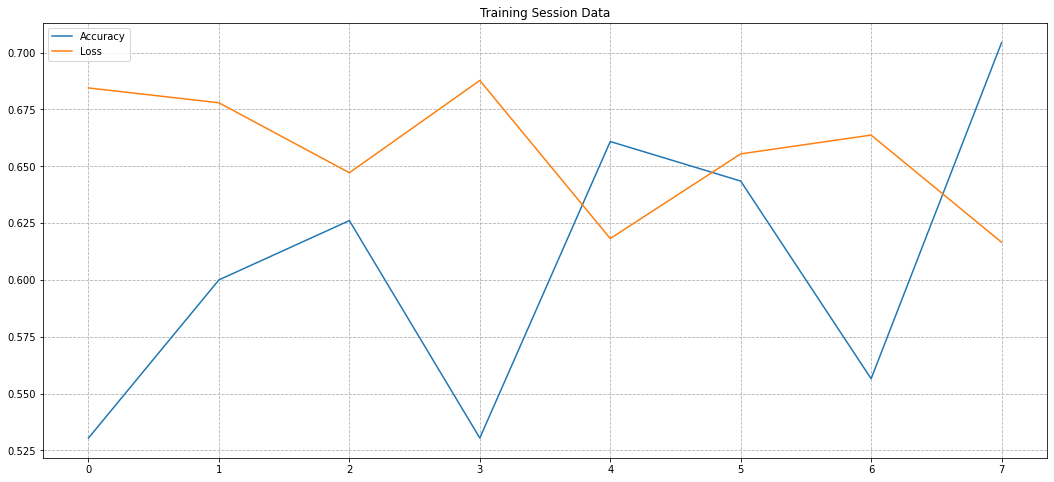

In [16]:
acc = history.history["accuracy"]
loss = history.history["loss"]

epochs_range = range(epochs)

fig, ax = plt.subplots(figsize=(18, 8))
ax.grid(which="both", linestyle="--")
ax.plot(epochs_range, acc, label="Accuracy")
ax.plot(epochs_range, loss, label="Loss")
ax.legend()

ax.set_title("Training Session Data")

Testing the model on new images

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


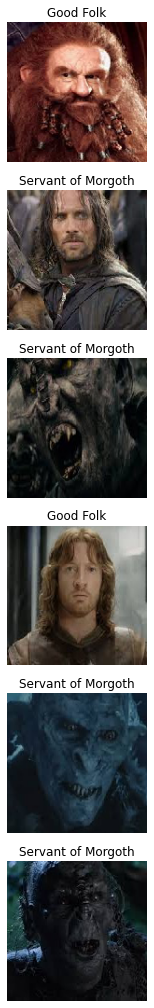

In [17]:
test_images, test_labels = next(test_data_gen)

_probabilities = model.predict(x=test_data_gen, verbose=False)

probabilities = []
for i in _probabilities.tolist():
  probabilities.append(round(i[0]))

plot_images(test_images[:], probabilities=probabilities)